#1.Data Preparation
##1.1 Importing Libraries

In [ ]:
!pip install optuna

In [ ]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score

#TODO: Set Up Custom rcParams?
plt.style.use('dark_background')

print('Imported all relevant libraries.')
print('check TODO')


#I found a potential way to hide these deprecation warnings
#https://stackoverflow.com/questions/879173/how-to-ignore-deprecation-warnings-in-python
import warnings
warnings.filterwarnings('ignore')

Imported all relevant libraries.
check TODO


##1.2 Load Dataset

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1.3 Checking Dataset Information

In [ ]:
print("Shape of training data: ", df_train.shape)
print("Shape of testing data: ", df_test.shape)

print("Shape of full data: ", df_train.shape[0]+df_test.shape[0])

Shape of training data:  (891, 12)
Shape of testing data:  (418, 11)
Shape of full data:  1309


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


#2.Exploratory Data Analysis
##2.1 Checking if Data is unbalanced

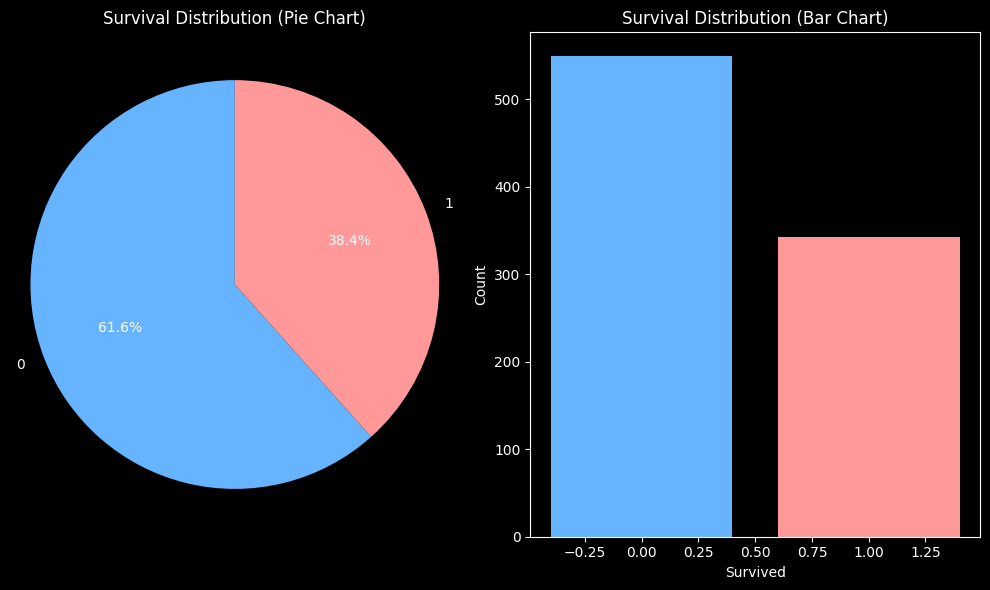

In [ ]:
# Get the counts of each class in the 'Survived' column
class_counts = df_train['Survived'].value_counts()

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Pie chart (on the left)
ax1.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_title('Survival Distribution (Pie Chart)')

# Bar chart (on the right)
ax2.bar(class_counts.index, class_counts, color=['#66b3ff', '#ff9999'])
ax2.set_title('Survival Distribution (Bar Chart)')
ax2.set_xlabel('Survived')
ax2.set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

Checking whether the data is balanced or not.

Data is not balanced, but I won't apply any technique like SMOTE or Undersampling. The chances of titanic were 24% so the model is realistic.

##2.2 Feature Engineering
###2.21 PassengerId

In [ ]:
df_train['PassengerId']

df_train.drop(['PassengerId'], axis=1, inplace=True)
#This column doesn't provide us any information rather than indexing so we're dropping it using drop() function.

###2.22 Name

In [ ]:
df_train['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
df_train["Title"] = df_train["Name"].str.extract('([A-Za-z]+)\.')
df_test["Title"] = df_test["Name"].str.extract('([A-Za-z]+)\.')

df_train["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [ ]:
def convert_title(title):
    if title in ["Ms", "Mile", "Miss"]:
        return "Miss"
    elif title in ["Mme", "Mrs"]:
        return "Mrs"
    elif title == "Mr":
        return "Mr"
    elif title == "Master":
        return "Master"
    else:
        return "Other"

df_train["Title"] = df_train["Title"].map(convert_title)
df_test["Title"] = df_test["Title"].map(convert_title)

df_train["Title"].value_counts()

,count
Title,
Mr,517
Miss,183
Mrs,126
Master,40
Other,25


In [ ]:
df_train.drop("Name", axis=1, inplace=True)
df_test.drop("Name", axis=1, inplace=True)

##2.23 Age
Age has a missing value of 20%, we will try imputation on this feature. Plotting visualizations and checking correlation in order to determine the best imputation method.

<Axes: xlabel='Age', ylabel='Density'>

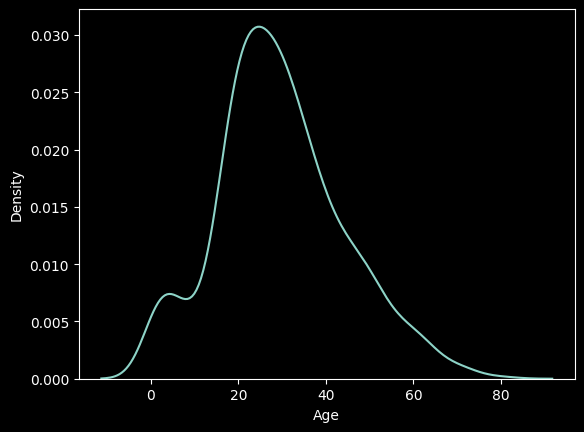

In [ ]:
sns.kdeplot(df_train['Age'])

The data is right skewed, we can't apply mean imputation here. We're going to need another method.

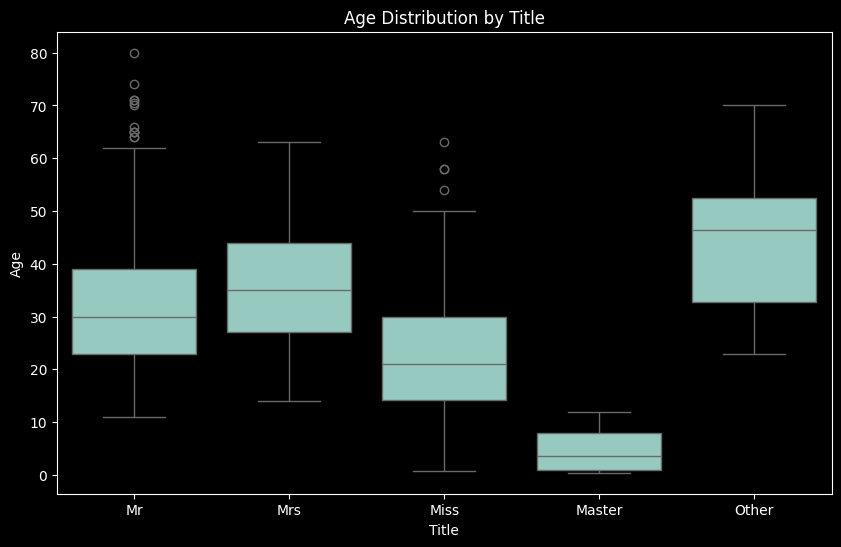

In [ ]:
# Create a boxplot using seaborn to visualize 'Age' distribution across 'Title'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Title', y='Age', data=df_train)

# Add title and labels
plt.title('Age Distribution by Title')
plt.xlabel('Title')
plt.ylabel('Age')

plt.show()


We'll use the 'Title' feature to impute the 'Age' feature. We're going to create bins now and assign them to their mean values accordingly.

In [ ]:
# Calculate mean age for each Title group
title_age_means = df_train.groupby('Title')['Age'].mean()

# Fill null ages for both train and test datasets
data = [df_train, df_test]
for df in data:
    df['Age'] = df.apply(
        lambda x: title_age_means[x['Title']] if pd.isnull(x['Age']) else x['Age'],
        axis=1
    )


<Axes: xlabel='Age', ylabel='Density'>

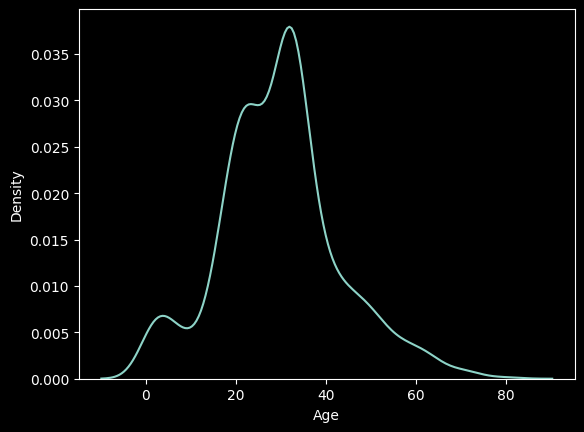

In [ ]:
sns.kdeplot(df_train['Age'])

##2.24 SibSp and Parch

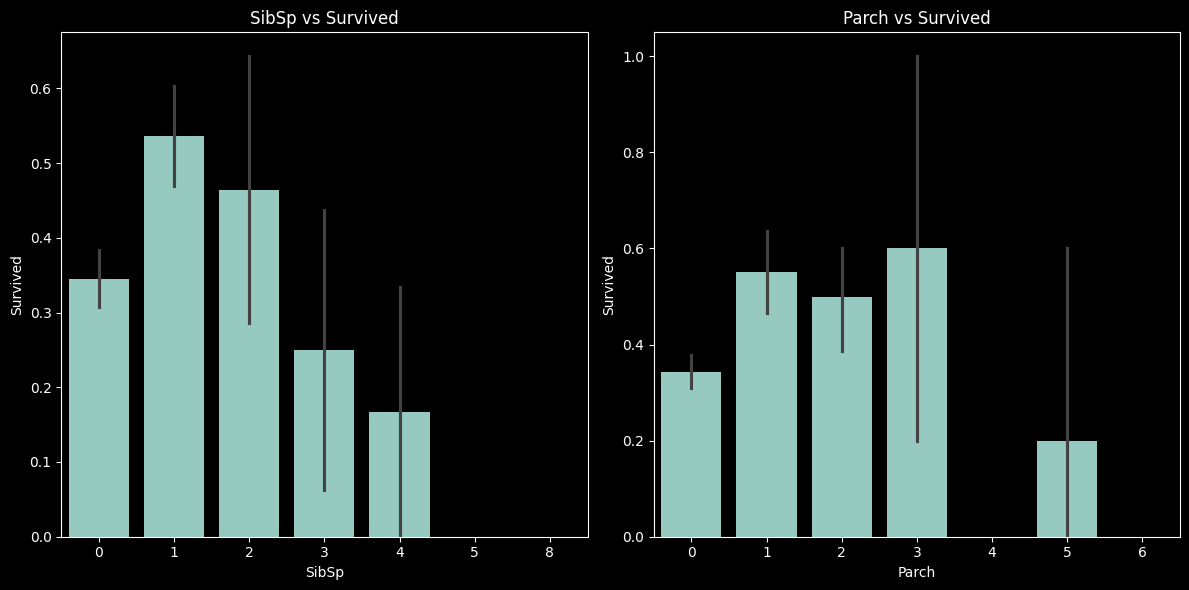

In [ ]:
# Create a figure with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First scatterplot: 'SibSp' vs 'Survived'
sns.barplot(data=df_train, x='SibSp', y='Survived', ax=axes[0])
axes[0].set_title('SibSp vs Survived')

# Second scatterplot: 'Parch' vs 'Survived'
sns.barplot(data=df_train, x='Parch', y='Survived', ax=axes[1])
axes[1].set_title('Parch vs Survived')

# Display the plots
plt.tight_layout()
plt.show()


Seems like people with families were more likely to survive. We can group both of these columns into one; FamilyCount.

In [ ]:
df_train['FamilyCount'] = df_train['SibSp'] + df_train['Parch']
df_test['FamilyCount'] = df_test['SibSp'] + df_test['Parch']

In [ ]:
df_train.drop(['SibSp','Parch'],axis=1,inplace=True)
df_test.drop(['SibSp','Parch'],axis=1,inplace=True)

##2.25 Ticket

In [ ]:
df_train['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


Seems like this feature is useless. It doesn't provide any important information.

In [ ]:
df_train.drop('Ticket',axis=1,inplace=True)
df_test.drop('Ticket',axis=1,inplace=True)

##2.26 Fare

In [ ]:
print(df_train['Fare'].isnull().sum())
print(df_test['Fare'].isnull().sum())

0
1


In [ ]:
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)

In [ ]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

##2.27 Cabin

In [ ]:
df_train['Cabin'].isnull().sum()

687

There are around 77% missing values in 'Cabin' feature. We'll remove this column, imputation is not the best option here.

In [ ]:
df_train.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

##2.28 Encoding Categorical Variables using OHE

In [ ]:
df_train.head()

In [ ]:
df_train = pd.get_dummies(df_train, columns=['Title'])
df_test = pd.get_dummies(df_test, columns=['Title'])

In [ ]:
df_train = pd.get_dummies(df_train, columns=["Sex"])
df_test = pd.get_dummies(df_test, columns=["Sex"])

In [ ]:
df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_test = pd.get_dummies(df_test, columns=['Embarked'])

This categorical data looks important. It denotes classes of people.
We'll use one-hot encoding on this.

In [ ]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Survived        0
Pclass          0
Age             0
Fare            0
Sex_female      0
Sex_male        0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Other     0
FamilyCount     0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64
PassengerId     0
Pclass          0
Age             0
Fare            0
Sex_female      0
Sex_male        0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Other     0
FamilyCount     0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64


In [ ]:
df_train.head(10)

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilyCount,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.00000,7.2500,False,True,False,False,True,False,False,1,False,False,True
1,1,1,38.00000,71.2833,True,False,False,False,False,True,False,1,True,False,False
2,1,3,26.00000,7.9250,True,False,False,True,False,False,False,0,False,False,True
3,1,1,35.00000,53.1000,True,False,False,False,False,True,False,1,False,False,True
4,0,3,35.00000,8.0500,False,True,False,False,True,False,False,0,False,False,True
5,0,3,32.36809,8.4583,False,True,False,False,True,False,False,0,False,True,False
6,0,1,54.00000,51.8625,False,True,False,False,True,False,False,0,False,False,True
7,0,3,2.00000,21.0750,False,True,True,False,False,False,False,4,False,False,True
8,1,3,27.00000,11.1333,True,False,False,False,False,True,False,2,False,False,True
9,1,2,14.00000,30.0708,True,False,False,False,False,True,False,1,True,False,False


In [ ]:
df_test.head(10)

,PassengerId,Pclass,Age,Fare,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilyCount,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,7.8292,False,True,False,False,True,False,False,0,False,True,False
1,893,3,47.0,7.0000,True,False,False,False,False,True,False,1,False,False,True
2,894,2,62.0,9.6875,False,True,False,False,True,False,False,0,False,True,False
3,895,3,27.0,8.6625,False,True,False,False,True,False,False,0,False,False,True
4,896,3,22.0,12.2875,True,False,False,False,False,True,False,2,False,False,True
5,897,3,14.0,9.2250,False,True,False,False,True,False,False,0,False,False,True
6,898,3,30.0,7.6292,True,False,False,True,False,False,False,0,False,True,False
7,899,2,26.0,29.0000,False,True,False,False,True,False,False,2,False,False,True
8,900,3,18.0,7.2292,True,False,False,False,False,True,False,0,True,False,False
9,901,3,21.0,24.1500,False,True,False,False,True,False,False,2,False,False,True


### Data preprocessing completed.

# 4.Exploratory Data Analysis

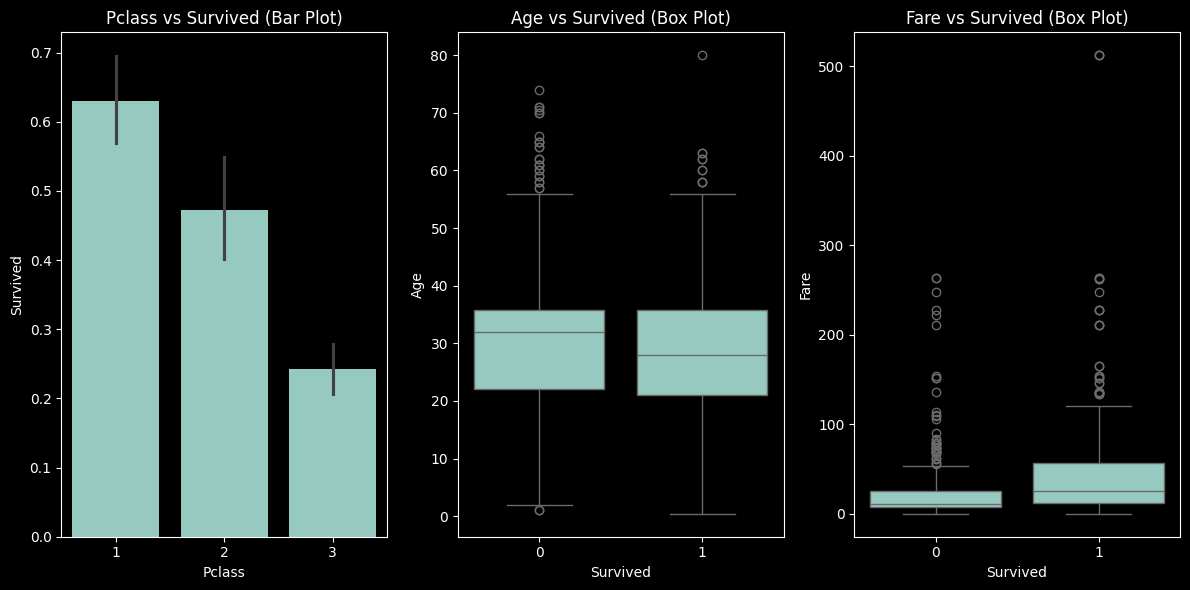

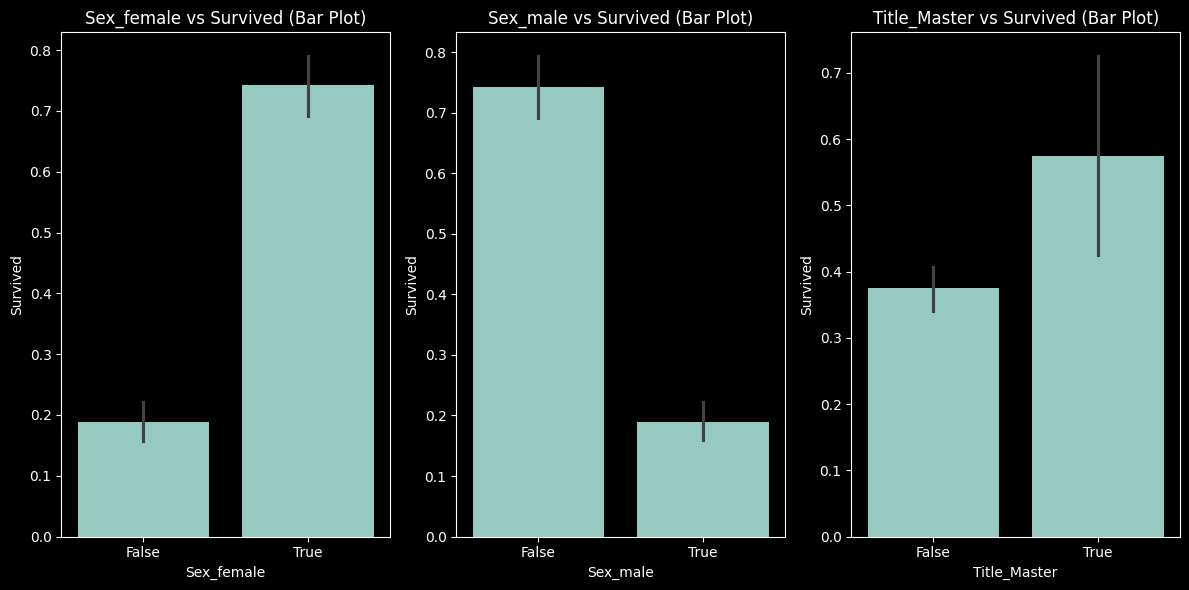

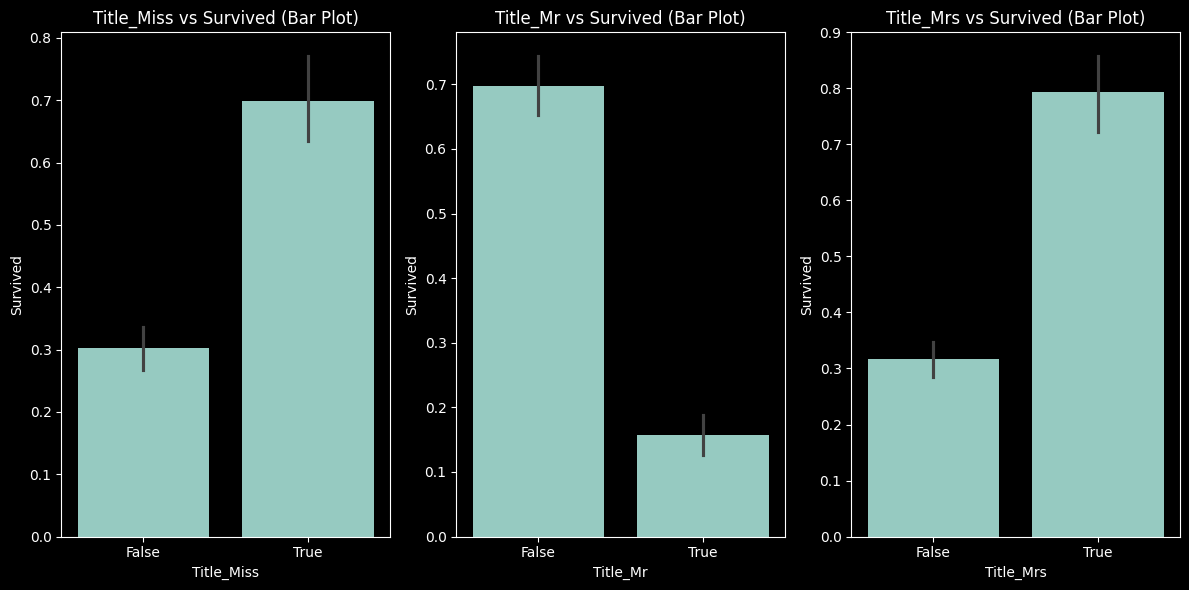

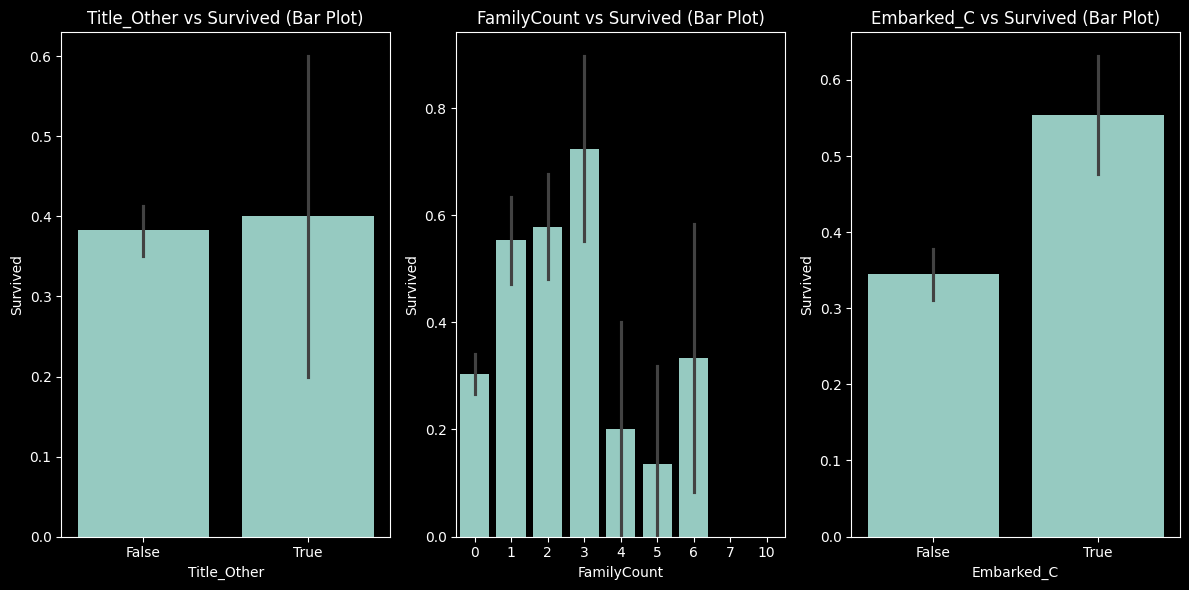

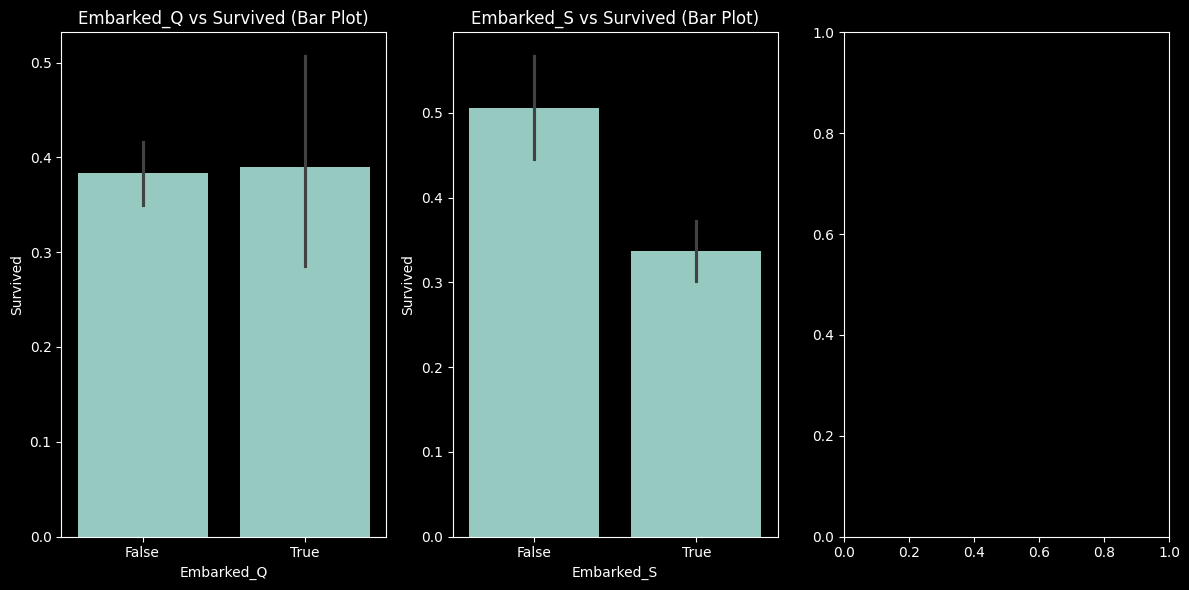

In [ ]:
# Function to plot graphs of all columns with the target column, side by side
def plot_columns_with_target(df, target):
    # Define the number of plots per row
    num_cols = 3
    # Iterate through each column in the DataFrame
    columns = [col for col in df.columns if col != target]  # Exclude the target column

    for i in range(0, len(columns), num_cols):
        # Create subplots with 1 row and `num_cols` columns
        fig, axes = plt.subplots(1, num_cols, figsize=(12, 6))

        for j, col in enumerate(columns[i:i+num_cols]):
            ax = axes[j] if num_cols > 1 else axes

            # Check if the column is numerical or categorical
            if df[col].dtype == 'object' or df[col].nunique() < 10:  # Categorical columns
                # Plot a bar plot for categorical columns
                sns.barplot(x=col, y=target, data=df, ax=ax)
                ax.set_title(f'{col} vs {target} (Bar Plot)')
            else:  # Numerical columns
                # Plot a box plot for numerical columns
                sns.boxplot(x=target, y=col, data=df, ax=ax)
                ax.set_title(f'{col} vs {target} (Box Plot)')

        plt.tight_layout()  # Adjust the layout to avoid overlap
        plt.show()


plot_columns_with_target(df_train, 'Survived')

# 5.Predictive Modeling

##5.1 Train test split

In [ ]:
X_train = df_train.drop('Survived',axis=1)
y_train = df_train['Survived']

X_test = df_test.copy()

##5.2 Model Evaluation and Hyperparameter Tuning using Optuna

In [ ]:
def objective(trial):
    # Choose the algorithm to tune
    classifier_name = trial.suggest_categorical('classifier', [
        'SVC', 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier',
        'GaussianNB', 'RandomForest', 'GradientBoostingClassifier', 'XGBClassifier'
    ])

    if classifier_name == 'SVC':
        # SVC hyperparameters
        C = trial.suggest_float('C', 0.1, 100, log=True)  # Regularization parameter
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])  # Kernel coefficient
        model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42)

    elif classifier_name == 'LogisticRegression':
        # Logistic Regression hyperparameters
        C = trial.suggest_float('C', 0.01, 100.0, log=True)  # Inverse of regularization strength
        solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'sag', 'saga'])
        penalty = trial.suggest_categorical('penalty', ['l2'])  # Regularization type
        max_iter = trial.suggest_int('max_iter', 100, 500)  # Max iterations
        model = LogisticRegression(C=C, solver=solver, penalty=penalty, max_iter=max_iter, random_state=42)

    elif classifier_name == 'KNeighborsClassifier':
        # K-Nearest Neighbors hyperparameters
        n_neighbors = trial.suggest_int('n_neighbors', 1, 50)  # Number of neighbors
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])  # Weight function
        p = trial.suggest_int('p', 1, 2)  # Power parameter for Minkowski metric (1=Manhattan, 2=Euclidean)
        model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)

    elif classifier_name == 'DecisionTreeClassifier':
        # Decision Tree hyperparameters
        max_depth = trial.suggest_int('max_depth', 1, 50)  # Maximum depth of tree
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)  # Minimum samples to split node
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)  # Minimum samples in leaf
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])  # Split criterion
        model = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            criterion=criterion,
            random_state=42
        )

    elif classifier_name == 'GaussianNB':
        # Gaussian Naive Bayes hyperparameters
        model = GaussianNB()  # No specific hyperparameters to tune for GaussianNB in most cases.

    elif classifier_name == 'RandomForest':
        # Random Forest hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 100)  # Number of trees
        max_depth = trial.suggest_int('max_depth', 3, 50)  # Maximum depth of tree
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)  # Minimum samples to split node
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)  # Minimum samples in leaf
        bootstrap = trial.suggest_categorical('bootstrap', [True, False])  # Use bootstrap sampling
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap,
            random_state=42
        )

    elif classifier_name == 'GradientBoostingClassifier':
        # Gradient Boosting hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 100)  # Number of boosting stages
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)  # Learning rate
        max_depth = trial.suggest_int('max_depth', 3, 50)  # Maximum depth of tree
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)  # Minimum samples to split node
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)  # Minimum samples in leaf
        model = GradientBoostingClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

    elif classifier_name == 'XGBClassifier':
        # XGBoost hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 500)  # Number of trees
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)  # Learning rate
        max_depth = trial.suggest_int('max_depth', 3, 50)  # Maximum depth of tree
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.3, 1.0)  # Subsample ratio of columns
        subsample = trial.suggest_float('subsample', 0.5, 1.0)  # Subsample ratio of rows
        model = XGBClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            colsample_bytree=colsample_bytree,
            subsample=subsample,
            random_state=42
        )

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score


In [ ]:
# Create a study and optimize it
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100)

print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2024-10-11 00:23:22,903] A new study created in memory with name: no-name-179cb11a-d624-4178-b29c-466b895c9266
[I 2024-10-11 00:23:22,935] Trial 0 finished with value: 0.8058361391694725 and parameters: {'classifier': 'DecisionTreeClassifier', 'max_depth': 30, 'min_samples_split': 12, 'min_samples_leaf': 6, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8058361391694725.
[I 2024-10-11 00:23:22,983] Trial 1 finished with value: 0.755331088664422 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 43, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.8058361391694725.
[I 2024-10-11 00:23:23,073] Trial 2 finished with value: 0.6419753086419754 and parameters: {'classifier': 'SVC', 'C': 0.14105558115872854, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 0 with value: 0.8058361391694725.
[I 2024-10-11 00:23:23,180] Trial 3 finished with value: 0.7160493827160493 and parameters: {'classifier': 'LogisticRegression', 'C': 0.06291504065546524, 'solve

Best trial:
  Value: 0.8462401795735129
  Params: 
    classifier: GradientBoosting
    n_estimators: 79
    learning_rate: 0.026825009049551683
    max_depth: 37
    min_samples_split: 16
    min_samples_leaf: 11


In [ ]:
# Print the best result
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.8462401795735129
Best hyperparameters: {'classifier': 'GradientBoosting', 'n_estimators': 79, 'learning_rate': 0.026825009049551683, 'max_depth': 37, 'min_samples_split': 16, 'min_samples_leaf': 11}


In [ ]:
# Train GradientBoostingClassifier using the best hyperparameters from Optuna
# Filter out 'classifier' from the params
best_params = {k: v for k, v in study.best_trial.params.items() if k != 'classifier'}
best_model = GradientBoostingClassifier(**best_params)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_train)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_train, y_pred)

# Print the test accuracy
print(f'Test Accuracy with best hyperparameters: {test_accuracy:.2f}')

Test Accuracy with best hyperparameters: 0.90


# 6.Conclusion and Reporting

In [ ]:
y_pred = best_model.predict(X_test)

submission = pd.read_csv("gender_submission.csv")
submission["Survived"] = y_pred
submission.to_csv('submission.csv', index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- PassengerId
